In [1]:
import sys
path1 = "/home/piotr/piotr/inz/indoor-semantic-segmentation"
path2 = "/mnt/c/Users/piotr.hondra/Documents/inz/indoor-semantic-segmentation/"
path = path2
sys.path.append(path)

In [2]:
import seaborn as sns
from src import multitask_datamod, constants
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from tqdm import tqdm

/home/phondra/miniconda3/envs/sensors/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
dm = multitask_datamod.SegmentationDataModule(path,transforms=None, num_classes=13)
dm.setup("fit")
train = dm.train_set

NameError: name 'path' is not defined

In [ ]:
plt.imshow(train[0][0]/255)

In [ ]:
np.unique(train[0][1], return_counts=True)

In [ ]:
# d = {k:0 for k in range(40)}
from tqdm import tqdm


a = np.zeros((len(train),41))
for idx, (img,mask) in tqdm(enumerate(train), total=len(train)):
    indices, vals = np.unique(mask, return_counts=True)
    # list(map(int,indices.tolist()))
    indices.astype(int)
    indices[indices==255] = 40
    indices = indices.astype(np.uint8)
    a[idx,indices] = vals
    # ap[]
#     for idx in indices
#     break



In [ ]:

# columns = [str(i) for i in range(41)]
# columns[40] = "255"
df = pd.DataFrame(a, columns=constants.NYU_V2_segmentation_classes+["void"])
df.sum(axis=0).reset_index()

In [ ]:
sns.set_theme()
ax = sns.barplot(df.sum(axis=0).reset_index(), x=0, y="index", color="green", log=True)
# for i in ax.containers:
#     ax.bar_label(i,)

In [ ]:
plt.imshow(train[0][1])

In [13]:
# d = {k:0 for k in range(40)}
num_classes=13 
dm = multitask_datamod.SegmentationDataModule(path,transforms=None, num_classes=num_classes)
dm.setup("fit")
train = dm.train_set
uniqs = set()
for idx, (img,mask) in tqdm(enumerate(train), total=len(train)):
    indices, vals = np.unique(mask, return_counts=True)
    uniqs.update(indices.tolist())
    # print(indices)
    # np.hstack(indices)
    # break
# a = np.zeros((len(train),num_classes+1))
# for idx, (img,mask) in tqdm(enumerate(train), total=len(train)):
#     # list(map(int,indices.tolist()))
#     indices.astype(int)
#     indices[indices==255] = num_classes
#     indices = indices.astype(np.uint8)
#     a[idx,indices] = vals
#     # ap[]
# #     for idx in indices
# #     break



100%|██████████| 795/795 [00:19<00:00, 41.84it/s]


In [14]:
uniqs

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 255.0}

In [19]:
df = pd.DataFrame(a, columns=constants.NYU_V2_segmentation_13classes+["void"])
df.sum(axis=0).reset_index()
df.sum(axis=0).values.astype(int)

array([11611728,  8578042,  1308322,  3535427,  8258474, 23949931,
       35664840, 31453241,  4864604,  5747842,  7347520,  1349733,
       57555778, 42998518])

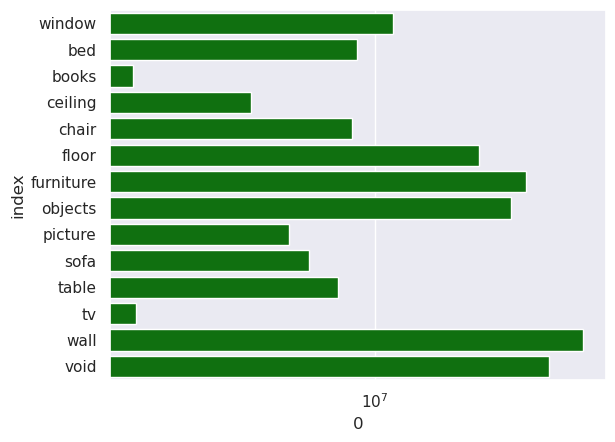

In [11]:
sns.set_theme()
ax = sns.barplot(df.sum(axis=0).reset_index(), x=0, y="index", color="green", log=True)
# for i in ax.containers:
#     ax.bar_label(i,)